# PROJECT INTRODUCTION

**Project name:** Deep Imbalanced Regression for imbalanced dataset.\
**Team members:** \


1.   Nguyễn Ngọc Hà My
2.   Nguyễn Phạm Hồng Duyên
3.   Trần Thị Thu Hà
4.   Nguyễn Thanh Thanh Trúc

# Dataset
**Data Source:** [Spotify dataset from Kaggle](https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets) \
**Features Descriptions**:

There are 20 columns in this dataset and their description are as follows.

* `id`: *unique* identifier for each track used by Spotify (*randomly* generated alphanumeric string)
name: track name
* `popularity`: song *popularity score* as of ***March 2021*** on a normalized scale [0-100] where 100 is the most popular
* `duration_ms`: duration of track in *milliseconds*
* `explicit`: true or false if the song contains *explicit content*.
* `artists`: name of the *main artist*
* `id_artists`: *unique* identifier for each artist used by Spotify
* `release_date`: when the album was released (date format: yyyy/mm/dd)
* `danceability`: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* `energy`: measure from 0.0 to 1.0 and represents a perceptual measure of *intensity and activity*. Typically, energetic tracks feel fast, loud, and noisy.
* `key`: The estimated *overall key* of the track. Integers map to pitches using standard *Pitch Class notation*. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is set to -1.
* `loudness`: The overall loudness of a track in decibels (dB). Values typical range between -60 and 0 db.
* `mode`: Mode indicates the modality (major=1 or minor=0) of a track, the type of scale from which its melodic content is derived.
* `speechiness`: measures from 0.0 to 1.0 and detects the presence of *spoken words* in a track. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
* `acousticness`: confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
* `instrumentalness`: measure from 0.0 to 1.0 and represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
* `liveness`: likelihood measure from 0.0 to 1.0 and indicates the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was *performed live*.
* `valence`: A measure from 0.0 to 1.0 describing the musical *positiveness* conveyed by a track.
* `tempo`: The overall estimated tempo of a track in beats per minute (BPM)
* `time_signature`: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

# Data Exploring:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data Collection, Data Cleaning & Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# Model Building
import itertools
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, RNN, Input, Bidirectional
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.metrics import accuracy_score, mean_squared_error as mse
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Phân tích và trực quan dữ liệu/data/tracks.csv")
data.sample(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
365829,69QnkvrvdrIf81NhNPF6Ca,Benimle Oynarmısın,35,144240,0,['Bülent Ortaçgil'],['1eY7YyYjc9jGnsHdJka906'],1993-04-15,0.341,0.120,7,-21.983,1,0.0427,0.91100,0.190000,0.1520,0.245,184.517,4
416363,0qgZJeru7Sw3wRBOGV6H89,我是如此相信(電影《天火》主題曲),40,266383,0,['Jay Chou'],['2elBjNSdBE2Y3f0j1mjrql'],2019-12-16,0.503,0.502,0,-9.469,1,0.0294,0.28700,0.000017,0.0960,0.118,137.968,4
504396,5G84s8BgTyUejJPT31DTb2,Military of the Heart,33,219640,0,['Naked Lunch'],['30hO9XSIsRo5wnaaUOnQDn'],2006,0.471,0.727,2,-4.748,1,0.0284,0.18300,0.000033,0.3370,0.358,81.291,4
494434,7zZZORgnk9q6HKGwt0sdJ3,Jim Knopf und die Wilde 13 - Teil 08,20,95005,0,['Michael Ende'],['1VORulhv2aMemo1kSvxdVX'],1973,0.524,0.540,0,-18.571,0,0.9200,0.73400,0.000000,0.6070,0.384,128.911,5
196962,5ckNlvW9UHnNM8QWPN7Z3x,Si un Dia Te Sientes Sola,32,202627,0,['Anthony Rios'],['1NXbTpqDX1ho8hjC8hyHd3'],1997-12-01,0.453,0.485,2,-8.758,1,0.0507,0.60600,0.000000,0.1770,0.478,146.919,3
154836,0HF2v0OhCB24qGiHpoSuNv,Mi soledad y yo,52,298702,0,['Alejandro Sanz'],['5sUrlPAHlS9NEirDB8SEbF'],2004-09-23,0.281,0.534,8,-7.045,0,0.0333,0.16300,0.000010,0.1200,0.217,78.770,4
16434,1o51USsHQkUwQE7GTc2ZcP,Luna marinara,0,159556,0,['Carlo Buti'],['2X9ZzmPwihIKKf2hIFfPyX'],1942-04-06,0.266,0.187,9,-15.735,0,0.0481,0.99400,0.637000,0.1470,0.505,72.721,4
186844,0PRqWiyOFMHVee81mr1bp6,If We Ever Meet Again,48,263178,0,"['Timbaland', 'Katy Perry']","['5Y5TRrQiqgUO4S36tzjIRZ', '6jJ0s89eD6GaHleKKy...",2010-08-24,0.645,0.606,8,-7.157,1,0.0301,0.00796,0.000000,0.0751,0.369,126.008,4
479387,1mNi3V6bvrwtgQ1yYGN6aG,Guitarras Al Viento,7,164720,0,['Sandro'],['5srsgtoePlsp0eQIXmta1O'],1969-10-27,0.433,0.846,4,-5.987,0,0.1160,0.64000,0.000000,0.4510,0.819,85.266,4
273664,5Cmo4Ig37IaKnyBDbmZesO,陶造我一生,18,261560,0,['蘇如紅'],['6J4bzz6sZ4Exn4atotITup'],1999-01-01,0.424,0.512,8,-7.829,1,0.0302,0.79900,0.000000,0.1540,0.179,147.729,4


In [ ]:
data.shape

(586672, 20)

Dữ liệu bao gồm 586672 samples và 20 features

In [ ]:
# Kiểm tra kiểu dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
# Đổi kiểu dữ liệu của biến 'release_date' sang kiểu datetime
data['release_date'] = pd.to_datetime(data['release_date'])
# Find the first date and the last date in the dataset
print(f'The first date: {data.release_date.min()}')
print(f'The last date: {data.release_date.max()}')

The first date: 1900-01-01 00:00:00
The last date: 2021-04-16 00:00:00


In [ ]:
# Kiểm tra giá trị bị khuyết
data.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

Chỉ có biến `name` là bị khuyết 71 giá trị. Tuy nhiên ta sẽ tiến hành phân tích thăm dò để xem biến này có ảnh hưởng đến mô hình hay không trước khi xử lý giá trị bị khuyết. Nếu biến này không ảnh hưởng đến mô hình dự đoán biến mục tiêu thì ta không cần quan tâm.

**Check the summary statistics**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


**Kiểm tra phân phối**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f851976ecd0>,
      dtype=object)

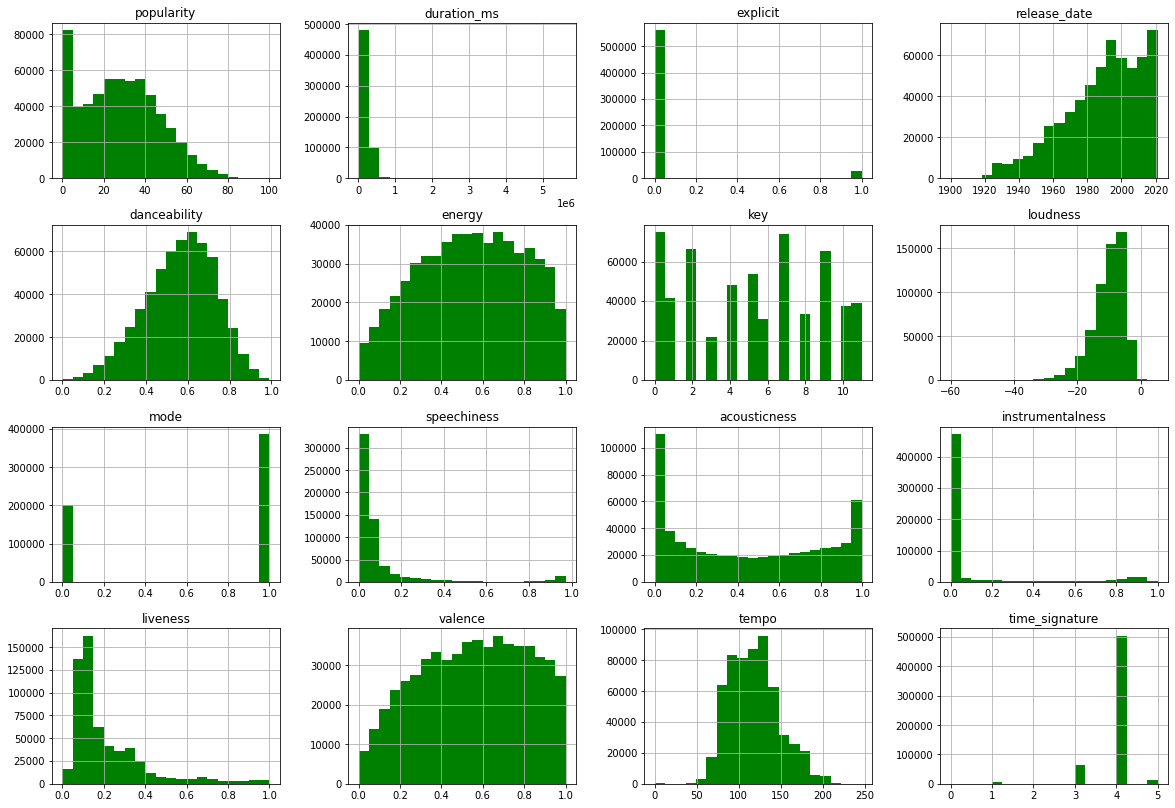

In [ ]:
data.hist(bins=20, color='green', figsize=(20,14))

Dữ liệu có biến mục tiêu là `popularity` có phân phối không cân bằng. Nhiều ở đoạn popularity<50 và bị thiếu dữ liệu ở khoảng popularity > 80

Ngoài ra, các features kiểu số liên tục cũng có phân phối không cân bằng

In [ ]:
# Find the categorical variables
categorical_var = data.select_dtypes(include = 'object')

# Count values
for col in categorical_var.columns:
  print(f'{col}: {categorical_var[col].nunique()}')

id: 586672
name: 446474
artists: 114030
id_artists: 115062


# Features selection:

* Các biến số:

Text(0.5, 1.0, 'Correlation between numerical features')

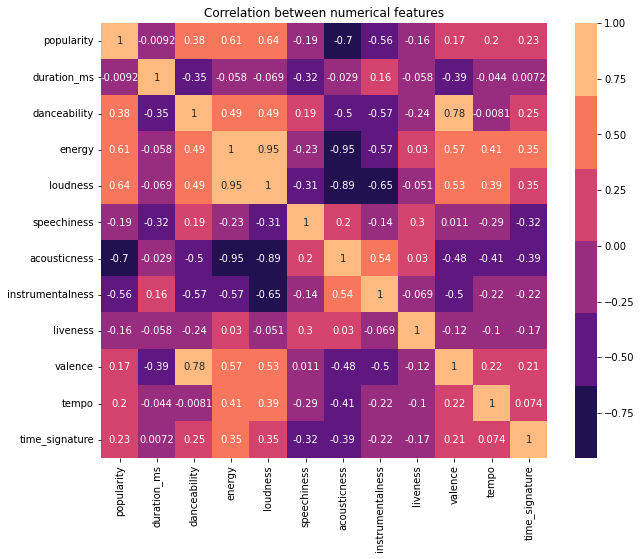

In [ ]:
plt.figure(figsize=(10,8))
corr_matrix = data.corr().drop(['key','mode','explicit'], axis=1).corr(method='pearson')
cmap = sns.color_palette('magma')
sns.heatmap(corr_matrix, annot=True, cmap=cmap)
plt.title('Correlation between numerical features')

In [ ]:
high_corr = abs(corr_matrix)['popularity'].sort_values(ascending=False).to_frame().reset_index()
high_corr.columns = ['features', 'Corr']
highcorr_features = high_corr['features']
for f in highcorr_features:
  print(f, ':', stats.pearsonr(data[f], data['popularity'])) 

popularity : (0.9999999999999891, 0.0)
acousticness : (-0.37088166120337357, 0.0)
loudness : (0.3270282258824776, 0.0)
energy : (0.3023152217929196, 0.0)
instrumentalness : (-0.2364873145523973, 0.0)
danceability : (0.18699972321301456, 0.0)
time_signature : (0.08675881993137277, 0.0)
tempo : (0.07136446416467192, 0.0)
speechiness : (-0.047357137484146265, 2.067072280290496e-288)
valence : (0.004643291459073235, 0.00037580238879194303)
liveness : (-0.04873992873068067, 2.1643714136511281e-305)
duration_ms : (0.027680666048806556, 8.426127656160351e-100)


**Nhận xét:** Các biến `acousticness`, `loudness`, `energy` có correlation ở mức có tương quan với biến `popularity` và có giá trị p_value < 0.001 nên kết quả có ý nghĩa thống kê. Ta có thể kết luận các biến này có ảnh hưởng đến biến target và đưa vào mô hình dự đoán

Trực quan thêm Regression plot và Residual plot cho các biến này.

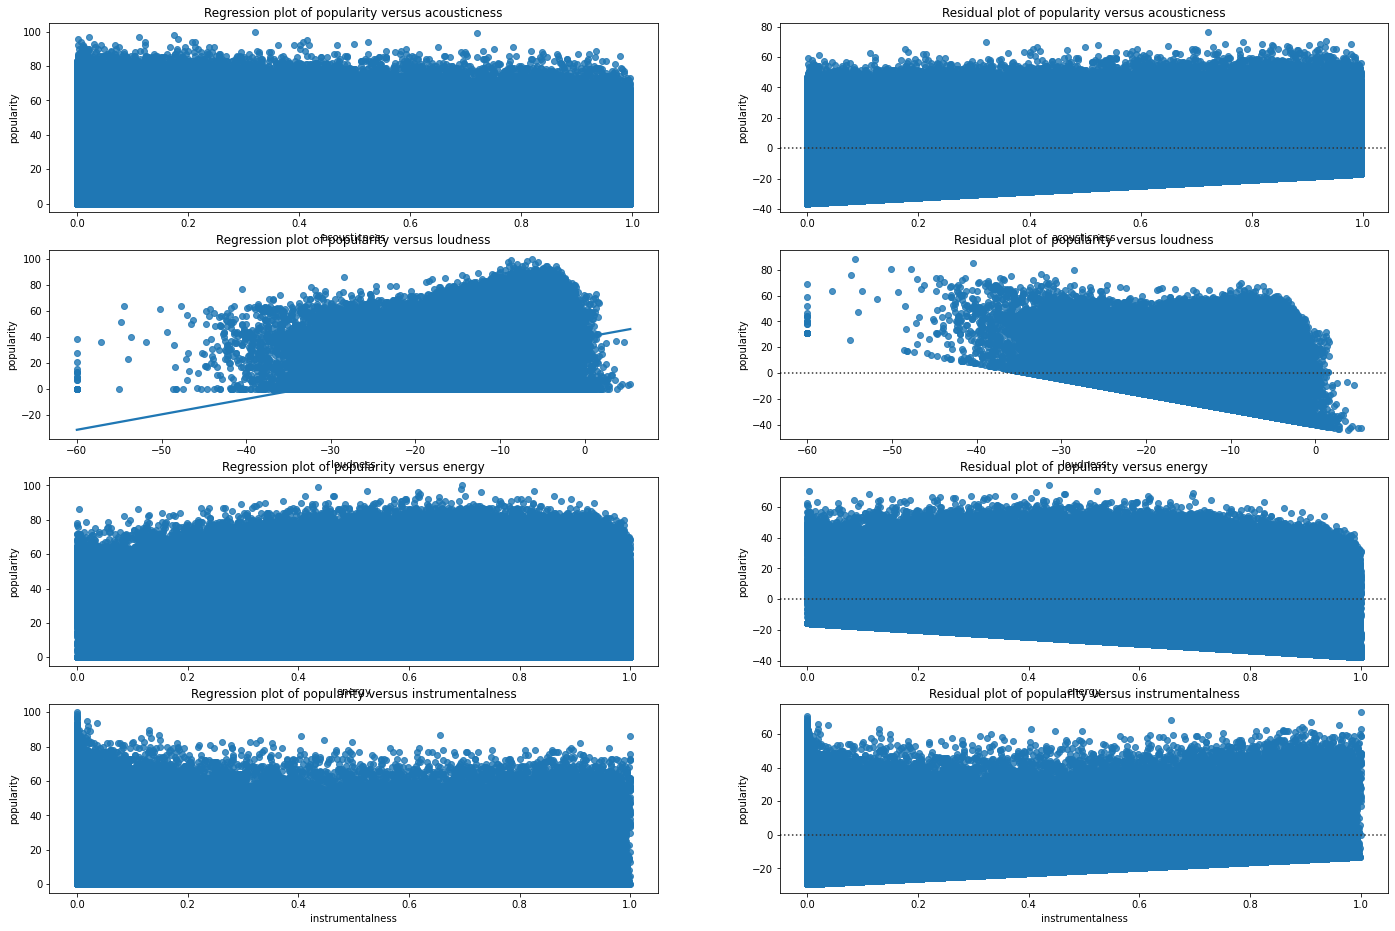

In [ ]:
list_num = ['acousticness', 'loudness', 'energy', 'instrumentalness']
i = 1
plt.figure(figsize=(20,16))
for l in list_num:
  plt.subplot(4,2,i)
  sns.regplot(data=data, x=l, y='popularity')
  plt.title('Regression plot of popularity versus '+ l)
  plt.subplot(4,2,i+1)
  sns.residplot(data=data, x=l, y='popularity')
  plt.title('Residual plot of popularity versus '+l)
  i+=2

* Các biến phân loại nhưng thuộc dạng số:

In [ ]:
list_cater = ['key', 'mode', 'explicit']
for l in list_cater:
  print('\nunique values of ', l, np.unique(data[l]))


unique values of  key [ 0  1  2  3  4  5  6  7  8  9 10 11]

unique values of  mode [0 1]

unique values of  explicit [0 1]


Vẽ boxplot cho các biến trên:

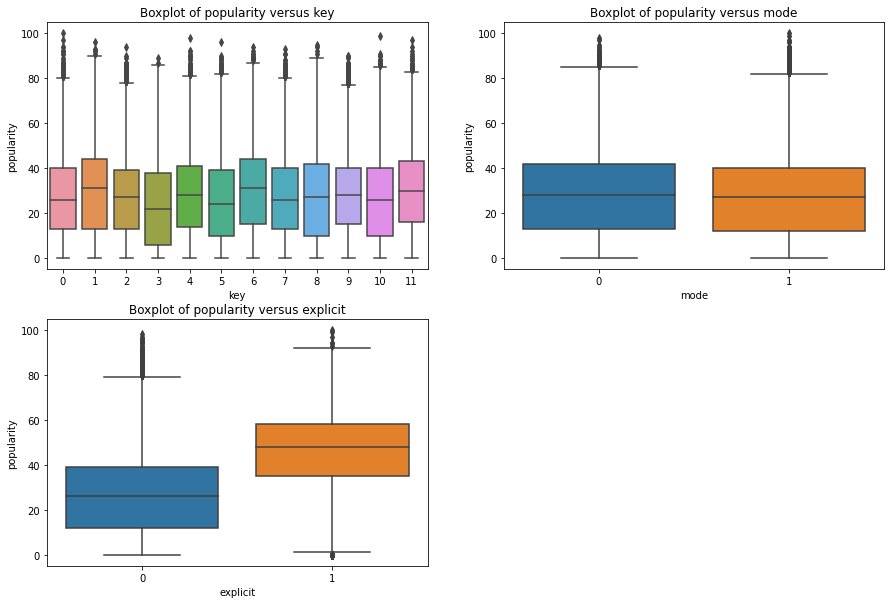

In [ ]:
i = 1
plt.figure(figsize=(15,10))
for l in list_cater:
  plt.subplot(2,2,i)
  sns.boxplot(data=data, x=l, y='popularity')
  plt.title('Boxplot of popularity versus '+  l)
  i+=1

Phân tích ANOVA

In [ ]:
#Đối với biến mode
grouped_mode = data.groupby(['mode'])
anova_mode = stats.f_oneway(grouped_mode.get_group(1)['popularity'],
                            grouped_mode.get_group(0)['popularity'])
anova_mode

F_onewayResult(statistic=665.2344269575116, pvalue=1.3123968525783694e-146)

In [ ]:
#Đối với biến explicit
grouped_explicit = data.groupby(['explicit'])
anova_explicit = stats.f_oneway(grouped_explicit.get_group(1)['popularity'],
                            grouped_explicit.get_group(0)['popularity'])
anova_explicit

F_onewayResult(statistic=27542.19945333345, pvalue=0.0)

In [ ]:
#Đối với biến key
grouped_key = data.groupby(['key'])
anova_key = stats.f_oneway(grouped_key.get_group(0)['popularity'],
                           grouped_key.get_group(1)['popularity'],
                           grouped_key.get_group(2)['popularity'],
                           grouped_key.get_group(3)['popularity'],
                           grouped_key.get_group(4)['popularity'],
                           grouped_key.get_group(5)['popularity'],
                           grouped_key.get_group(6)['popularity'],
                           grouped_key.get_group(7)['popularity'],
                           grouped_key.get_group(8)['popularity'],
                           grouped_key.get_group(9)['popularity'],
                           grouped_key.get_group(10)['popularity'],
                           grouped_key.get_group(11)['popularity'])
anova_key

F_onewayResult(statistic=335.12208159856664, pvalue=0.0)

**Nhận xét:** 


* Boxplot giữa `popularity` và các biến `key`, `mode` có các box chồng lấp nhau nhiều, tuy nhiên kết quả phân tích One-way ANOVA cho thấy ở mức ý nghĩa nhỏ hơn 0.01 thu được F có giá trị lớn nên chúng ta không thể kết luận rằng các biến này là không quan trọng với biến `popularity`, mà thay vào đó ta vẫn sẽ giữ các biến này cho mô hình dự đoán của mình.
* Các boxplot của biến `explicit` và `popularity` ít chồng lấp lên nhau và kết quả One-way ANOVA ở mức ý nghĩa nhỏ hơn 0.01 thu được F có giá trị lớn cho nên biến `explicit` này là biến quan trọng cho việc phát triển mô hình dự đoán của chúng ta.

Vậy ta chọn được các biến `acousticness`, `loudness`, `energy`, `key`, `mode` và `explicit` cho mô hình dự đoán.

## Các insights của bộ dữ liệu

* Sự khác nhau giữa các đặc trưng của top 100 bài hái có độ phổ biến cao nhất với tất cả bài hát

In [ ]:
feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
# Find the most popular songs on Sportify
top20_songs= data.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False).head(100)
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top20_songs[feat_cols].mean(), ignore_index=True)
mean_vals = mean_vals.append(data[feat_cols].mean(), ignore_index=True)

print(mean_vals)

import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

   danceability    energy  speechiness  acousticness  instrumentalness  \
0      0.705892  0.652081     0.099778      0.239731          0.002109   
1      0.563594  0.542036     0.104864      0.449863          0.113451   

   liveness   valence  
0  0.195157  0.527300  
1  0.213935  0.552292  


* Các bài hát có độ phổ biến cao nhất được sáng tác vào các năm nào

Text(0.5, 1.0, 'Dictribution year in top 100')

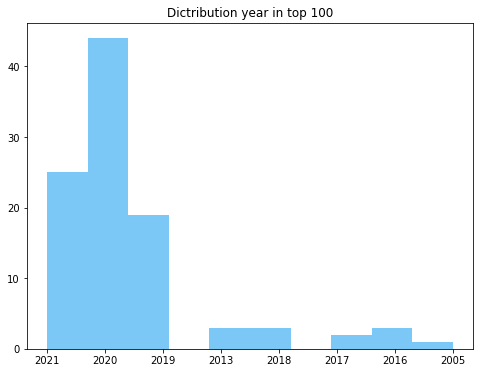

In [ ]:
most_popular = data.sort_values('popularity', ascending = False).head(100)
most_popular = most_popular[["release_date", "popularity"]]
y = []
for i in most_popular["release_date"]:
  j = str(i).split("-",1)
  y.append(j[0])
plt.figure(figsize=(8,6))
plt.hist(y,bins= 10, color = "#7BC8F6")
plt.title("Dictribution year in top 100")

* Các thể loại nhạc được ưa chuộng nhất hiện nay.

[Text(0.5, 1.0, 'Top 10 genre by popularity')]

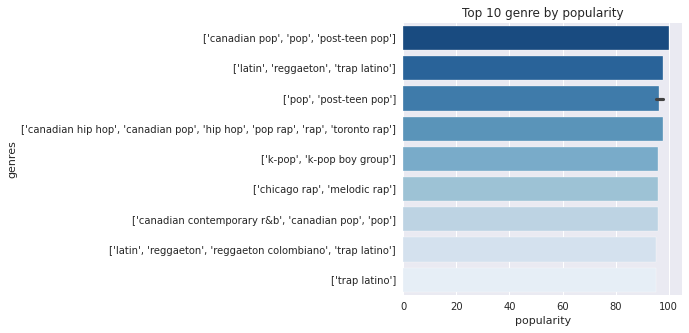

In [ ]:
df_artists = pd.read_csv('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/data/artists.csv')
df_artists.rename(columns = {"id": "id_artists"},inplace = True)
df_genre = df_artists.merge(data[['id_artists','duration_ms']], how='left', on='id_artists')
#Top 5 genre by popularity
sns.set_style(style = 'darkgrid')
plt.figure(figsize=(5,10))
plt.rcParams.update({'font.size': 2})
famous = df_genre.sort_values('popularity', ascending = False).head(10)
sns.barplot(y='genres', x= 'popularity',palette="Blues_r" ,data= famous).set(title="Top 10 genre by popularity")


#Data Preprocessing and Model

* Train/test/val split

In [5]:
# split train/val/test
trainset, testset = train_test_split(data, test_size=0.2, random_state = 42)
testset, valset = train_test_split(testset, test_size=0.5, random_state = 42)

# select features 
# Loại bỏ các biến chắc chắn không liên quan 
X_tr = trainset[['acousticness','loudness','energy','explicit', 'key','mode']]
y_tr = trainset['popularity']
X_te = testset[['acousticness','loudness','energy','explicit','key','mode']]
y_te = testset['popularity']
X_val= valset[['acousticness','loudness','energy','explicit','key','mode']]
y_val= valset['popularity']

print(X_tr.shape, y_tr.shape)
print(X_te.shape, y_te.shape)
print(X_val.shape, y_val.shape)

(469337, 6) (469337,)
(58667, 6) (58667,)
(58668, 6) (58668,)


### Using plain Deep learning model

In [6]:
from tensorflow.keras.models import Sequential, load_model, Model
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import Constant
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import  TimeDistributed, Dense, Input, LSTM, Embedding, Bidirectional
from sklearn.linear_model import LinearRegression

In [8]:
plain_model = Sequential()
plain_model.add(Dense(20, input_shape=(6,), kernel_initializer='normal', activation='relu'))
plain_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
plain_model.add(Dense(1, kernel_initializer='normal'))
plain_model.compile(loss='mse', optimizer='adam')
plain_model.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=3)

Epoch 1/3
14667/14667 [==============================] - 42s 3ms/step - loss: 292.0007 - val_loss: 258.0684
Epoch 2/3
14667/14667 [==============================] - 37s 3ms/step - loss: 257.2737 - val_loss: 252.4581
Epoch 3/3
14667/14667 [==============================] - 41s 3ms/step - loss: 255.1077 - val_loss: 250.5223


In [ ]:
plain_model = load_model('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/plain_model.h5')

In [9]:
y_plain_predict = plain_model.predict(X_te)

1834/1834 [==============================] - 2s 1ms/step


In [10]:
y_plain_predict=np.squeeze(y_plain_predict)

Text(0.5, 1.0, 'Test error between true values and fitted values')

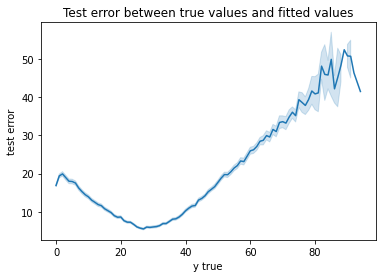

In [11]:
df = pd.DataFrame({'y true': y_te, 'y pred': y_plain_predict})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error between true values and fitted values')

* Sử dụng logistic regression:

In [ ]:
lr = LinearRegression()
lr.fit(X_tr, y_tr)
y_lr_predict=lr.predict(X_te)

In [ ]:
import pickle
filename = '/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/lr_model.sav'
pickle.dump(lr, open(filename, 'wb'))

Text(0.5, 1.0, 'Test error between true values and fitted values')

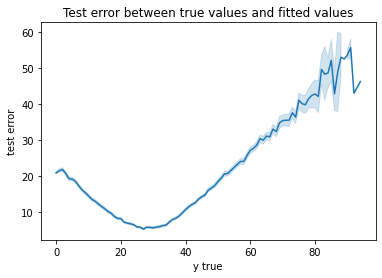

In [ ]:
df = pd.DataFrame({'y true': y_te, 'y pred': y_lr_predict})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error between true values and fitted values')

## Using Traditional Undersampling/Oversampling technique

Sử dụng SMOTE (Synthetic Minority Oversampling Technique) để cân bằng dữ liệu không cân bằng. Nó tăng ngẫu nhiên các mẫu thiểu số bằng cách sao chép chúng dựa trên k- hàng xóm gần nhất (k_nearest neighbors) cho mỗi ví dụ của lớp thiểu số.

Trong trường hợp này, chúng em sẽ chọn giá trị k-nearest neighbors bằng 5. Tuy nhiên, có nhiều giá trị y không có đến 5 samples để SMOTE có thể dựa vào và tạo ra dữ liệu training ảo bằng phương pháp nội suy tuyến tính (virtual training records by linear interpolation). Vì vậy đối với những giá trị y thuộc lớp thiểu số này, chúng em sẽ chỉ sử dụng random oversampling vì phương pháp này không phải chịu ràng buộc gì với số lượng samples mà lớp đó có.


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
y_counts = trainset['popularity'].value_counts().sort_values().to_frame().reset_index()
y_counts.columns = ['popularity','counts']
minority = y_counts[y_counts['counts']<6]
minority

,popularity,counts
0,95,1
1,99,1
2,100,1
3,98,1
4,96,2
5,93,2
6,97,2
7,94,4


In [ ]:
# Chia train dataset dựa trên biến mục tiêu đa số
majority = trainset[trainset['popularity']<93]
X_tr_majority = majority[['acousticness','loudness','energy','explicit', 'key','mode']]
y_tr_majority = majority[['popularity']]

# Chia train dataset dựa trên biến mục tiêu thiểu số

minority = trainset[trainset['popularity']>=93]
X_tr_minority = minority[['acousticness','loudness','energy','explicit', 'key','mode']]
y_tr_minority = minority[['popularity']]

* Sử dụng Random Oversampling với trainset chứa biến mục tiêu có giá trị thuộc thiểu số

In [ ]:
print('Before OverSampling, the shape of X_tr_minority: {}'.format(X_tr_minority.shape))
print('Before OverSampling, the shape of y_tr_minority: {} \n'.format(y_tr_minority.shape))
random = RandomOverSampler(random_state = 2)
X_tr_random, y_tr_random = random.fit_resample(X_tr_minority, y_tr_minority)
print('After OverSampling, the shape of X_tr_random: {}'.format(X_tr_random.shape))
print('After OverSampling, the shape of y_tr_random: {} \n'.format(y_tr_random.shape))

Before OverSampling, the shape of X_tr_minority: (14, 4)
Before OverSampling, the shape of y_tr_minority: (14, 1) 

After OverSampling, the shape of X_tr_random: (32, 4)
After OverSampling, the shape of y_tr_random: (32, 1) 



* Sử dụng SMOTE cho với trainset chứa biến mục tiêu có giá trị thuộc đa số

In [ ]:
print('Before OverSampling, the shape of X_tr_majority: {}'.format(X_tr_majority.shape))
print('Before OverSampling, the shape of y_tr_majority: {} \n'.format(y_tr_majority.shape))
smote = SMOTE(random_state=2)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr_majority, y_tr_majority)
print('After OverSampling, the shape of X_tr_smote: {}'.format(X_tr_smote.shape))
print('After OverSampling, the shape of y_tr_smote: {} \n'.format(y_tr_smote.shape))

Before OverSampling, the shape of X_tr_majority: (469323, 4)
Before OverSampling, the shape of y_tr_majority: (469323, 1) 

After OverSampling, the shape of X_tr_smote: (3334701, 4)
After OverSampling, the shape of y_tr_smote: (3334701, 1) 



Kết hợp train data đã resample lại với nhau

In [ ]:
X_tr_resample = pd.concat([X_tr_smote, X_tr_random])
y_tr_resample = pd.concat([y_tr_smote, y_tr_random])

# X_tr_resample.to_csv('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/X_tr_resample.csv')
# y_tr_resample.to_csv('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/y_tr_resample.csv')

Trực quan phân phối của biến mục tiêu sau khi đã resample

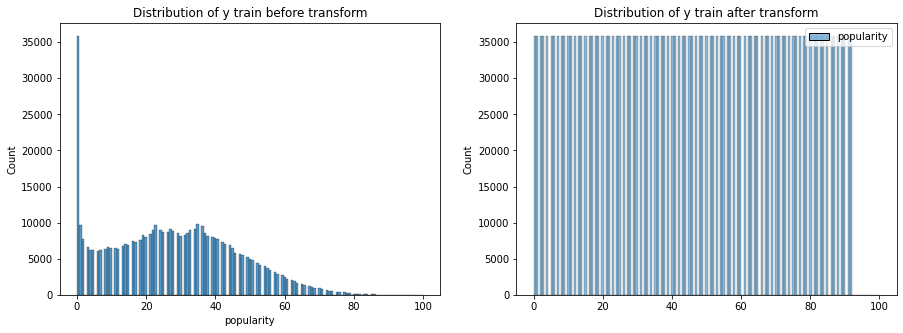

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(trainset, x='popularity')
plt.title('Distribution of y train before transform')
plt.subplot(1,2,2)
sns.histplot(y_tr_resample, color="purple")
plt.title('Distribution of y train after transform')
plt.show()
plt.savefig("/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/resampling_y.png")

Train Deep neural network model

In [ ]:
resample_model = Sequential()
resample_model.add(Dense(20, input_shape=(6,), kernel_initializer='normal', activation='relu'))
resample_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
resample_model.add(Dense(1, kernel_initializer='normal'))
resample_model.compile(loss='mse', optimizer='adam')
resample_model.fit(X_tr_resample, y_tr_resample, validation_data=(X_val, y_val), epochs=3)

Epoch 1/3
104211/104211 [==============================] - 247s 2ms/step - loss: 467.2915 - val_loss: 429.4863
Epoch 2/3
104211/104211 [==============================] - 245s 2ms/step - loss: 444.7282 - val_loss: 391.9355
Epoch 3/3
104211/104211 [==============================] - 242s 2ms/step - loss: 441.0103 - val_loss: 442.4071


In [ ]:
resample_model=load_model('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/resample_model.h5')
# X_tr_resample = pd.read_csv('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/X_tr_resample.csv')
# y_tr_resample = pd.read_csv('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/y_tr_resample.csv')

In [ ]:
y_smote_pred = resample_model.predict(X_te)
y_smote_pred = np.squeeze(y_smote_pred)

1834/1834 [==============================] - 2s 1ms/step


Text(0.5, 1.0, 'Test error between true values and fitted values')

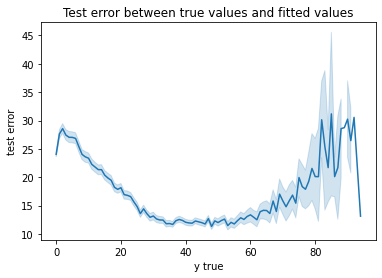

In [ ]:
df = pd.DataFrame({'y true': y_te, 'y pred': y_smote_pred})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error between true values and fitted values')

* Sử dụng Linear Regression

In [ ]:
lr_resample = LinearRegression()
lr_resample.fit(X_tr_resample, y_tr_resample)
y_lr_re_pred = lr_resample.predict(X_te)

Text(0.5, 1.0, 'Test error between true values and fitted values')

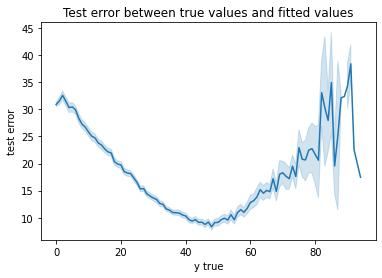

In [ ]:
df = pd.DataFrame({'y true': y_te, 'y pred': np.squeeze(y_lr_re_pred)})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error between true values and fitted values')

**Nhận xét:** Phương pháp resampling làm tăng số lượng điểm dữ liệu (từ 469323 lên 3334701 samples), điều này sẽ làm tăng thời gian training cho mô hình

## Using Near Miss-UnderSampling combined with SMOTE and Random OverSampling
Trong phần này, chúng em sẽ thực hiện cả 3 phương pháp Near Miss, SMOTE và Random Oversampling như sau:
* Sử dụng Near Miss để giảm số điểm dữ liệu có giá trị của biến mục tiêu là từ 0 đến 50
* Sử dụng SMOTE để tăng điểm dữ liệu từ 51 đến 92
* Sử dụng Random Oversampling để tăng điểm dữ liệu từ 93 đến 100

In [ ]:
# Chia train dataset để áp dụng Near Miss
majority1 = trainset[trainset['popularity']<51]
X_tr_miss = majority1[['acousticness','loudness','energy','explicit']]
y_tr_miss = majority1[['popularity']]

# Chia train dataset để áp dụng Oversampling
minority1 = trainset[trainset['popularity']>=51]

## Áp dụng SMOTE
smoteset = minority1[minority1['popularity']<93]
X_tr_smote = smoteset[['acousticness','loudness','energy','explicit']]
y_tr_smote = smoteset[['popularity']]
## Áp dụng Random Oversampling
randomset = minority1[minority1['popularity']>=93]
X_tr_random = randomset[['acousticness','loudness','energy','explicit']]
y_tr_random = randomset[['popularity']]

Go all in

In [ ]:
print('Before using Near Miss-UnderSampling, the shape of X_tr_miss: {}'.format(X_tr_miss.shape))
print('Before using Near Miss-UnderSampling, the shape of y_tr_miss: {} \n'.format(y_tr_miss.shape))
miss = NearMiss()
X_tr_miss, y_tr_miss = miss.fit_resample(X_tr_miss, y_tr_miss)
print('After using Near Miss-UnderSampling, the shape of X_tr_miss: {}'.format(X_tr_miss.shape))
print('After using Near Miss-UnderSampling, the shape of y_tr_miss: {} \n'.format(y_tr_miss.shape))

Before using Near Miss-UnderSampling, the shape of X_tr_miss: (413538, 4)
Before using Near Miss-UnderSampling, the shape of y_tr_miss: (413538, 1) 

After using Near Miss-UnderSampling, the shape of X_tr_miss: (256377, 4)
After using Near Miss-UnderSampling, the shape of y_tr_miss: (256377, 1) 



In [ ]:
print('Before using SMOTE-Oversampling, the shape of X_tr_smote: {}'.format(X_tr_smote.shape))
print('Before using SMOTE-Oversampling, the shape of y_tr_smote: {} \n'.format(y_tr_smote.shape))
smote = SMOTE(random_state=2)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr_smote, y_tr_smote)
print('After using SMOTE-Oversampling, the shape of X_tr_smote: {}'.format(X_tr_smote.shape))
print('After using SMOTE-Oversampling, the shape of y_tr_smote: {} \n'.format(y_tr_smote.shape))

Before using SMOTE-Oversampling, the shape of X_tr_smote: (55785, 4)
Before using SMOTE-Oversampling, the shape of y_tr_smote: (55785, 1) 

After using SMOTE-Oversampling, the shape of X_tr_smote: (202818, 4)
After using SMOTE-Oversampling, the shape of y_tr_smote: (202818, 1) 



In [ ]:
print('Before using Random Oversampling, the shape of X_tr_random: {}'.format(X_tr_random.shape))
print('Before using Random Oversampling, the shape of y_tr_random: {} \n'.format(y_tr_random.shape))
random = RandomOverSampler(random_state = 2)
X_tr_random, y_tr_random = random.fit_resample(X_tr_random, y_tr_random)
print('After using Random Oversampling, the shape of X_tr_random: {}'.format(X_tr_random.shape))
print('After using Random Oversampling, the shape of y_tr_random: {} \n'.format(y_tr_random.shape))

Before using Random Oversampling, the shape of X_tr_random: (14, 4)
Before using Random Oversampling, the shape of y_tr_random: (14, 1) 

After using Random Oversampling, the shape of X_tr_random: (32, 4)
After using Random Oversampling, the shape of y_tr_random: (32, 1) 



Kết hợp các data đã resample lại với nhau:

In [ ]:
X_tr_resample1 = pd.concat([X_tr_miss, X_tr_smote, X_tr_random])
y_tr_resample1 = pd.concat([y_tr_miss, y_tr_smote, y_tr_random])
# X_tr_resample1.to_csv('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/X_tr_resample1.csv')
# y_tr_resample1.to_csv('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/y_tr_resample1.csv')

print(X_tr.shape, y_tr.shape)
print(X_tr_resample1.shape, y_tr_resample1.shape)

(469337, 4) (469337,)
(459227, 4) (459227, 1)


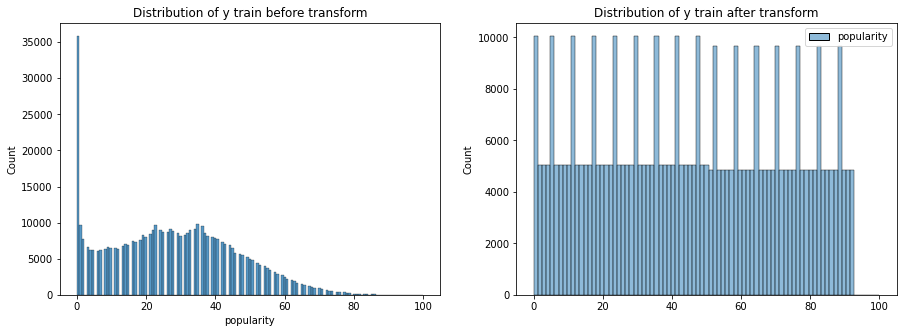

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(trainset, x='popularity')
plt.title('Distribution of y train before transform')
plt.subplot(1,2,2)
sns.histplot(y_tr_resample1)
plt.title('Distribution of y train after transform')
plt.show()
plt.savefig("/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/resampling_y_ver2.png")

In [ ]:
resample_model_ver2 = Sequential()
resample_model_ver2.add(Dense(20, input_shape=(6,), kernel_initializer='normal', activation='relu'))
resample_model_ver2.add(Dense(6, kernel_initializer='normal', activation='relu'))
resample_model_ver2.add(Dense(1, kernel_initializer='normal'))
resample_model_ver2.compile(loss='mse', optimizer='adam')
resample_model_ver2.fit(X_tr_resample1, y_tr_resample1, validation_data=(X_val, y_val), epochs=3)

Epoch 1/3
14351/14351 [==============================] - 37s 3ms/step - loss: 644.9944 - val_loss: 407.7176
Epoch 2/3
14351/14351 [==============================] - 36s 3ms/step - loss: 519.7121 - val_loss: 424.1722
Epoch 3/3
14351/14351 [==============================] - 35s 2ms/step - loss: 516.6619 - val_loss: 385.4503


In [ ]:
resample_model_ver2 = load_model('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/resample_model_ver2.h5')

In [ ]:
y_resample1_pred = resample_model_ver2.predict(X_te)
y_resample1_pred = np.squeeze(y_resample1_pred)

1834/1834 [==============================] - 2s 1ms/step


Text(0.5, 1.0, 'Test error between true values and fitted values')

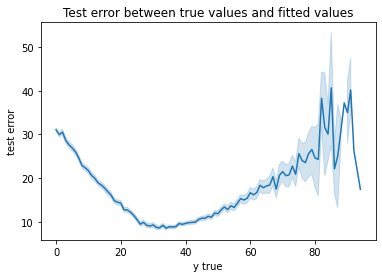

In [ ]:
df = pd.DataFrame({'y true': y_te, 'y pred': y_resample1_pred})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error between true values and fitted values')

* Sử dụng Linear Regression:

In [ ]:
lr_resample_ver2 = LinearRegression()
lr_resample_ver2.fit(X_tr_resample1, y_tr_resample1)
y_lr_re_pred2 = lr_resample_ver2.predict(X_te)
y_lr_re_pred2  = np.squeeze(y_lr_re_pred2)

Text(0.5, 1.0, 'Test error between true values and fitted values')

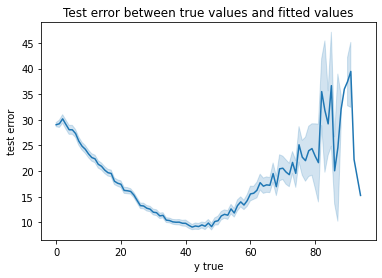

In [ ]:
df = pd.DataFrame({'y true': y_te, 'y pred': y_lr_re_pred2})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error between true values and fitted values')

## Using state-of-the-art Resampling Technique. 
## SMOGN (Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise)

**Giới thiệu:** Kỹ thuật tăng mẫu thiểu số tổng hợp cho hồi quy với nhiễu Gaussian (SMOGN) là kỹ thuật kết hợp việc sử dụng kỹ thuật tăng mẫu thiểu số tổng hợp cho hồi quy (SMOTER) với phép nội suy truyền thống, và sử dụng nhiễu Gaussian (SMOTER-GN). Phương pháp này chọn giữa hai kỹ thuật tăng mẫu (SMOTER hay SMOTER-GN) dựa trên việc quan sát các khoảng cách của KNN.
* Nếu khoảng cách là đủ gần, kỹ thuật SMOTER được áp dụng.
* Nếu cách xa nhau, SMOTER-GN được áp dụng.

In [ ]:
#install developer version
! pip install git+https://github.com/nickkunz/smogn.git

In [ ]:
import smogn

In [ ]:
## specify phi relevance values
rg_mtrx = [
    [0, 0, 0], ## under-sample ("minority")
    [80, 1,0], ## over-sample ("majority")
    [81, 1,0],
    [82, 1,0],
    [83, 1,0],
    [84, 1,0],
    [85, 1,0],
    [86, 1,0],
    [87, 1,0],
    [88, 1,0],
    [89, 1,0],
    [90, 1,0],
    [91, 1,0], ## over-sample
    [92, 1,0], ## over-sample
]

In [ ]:
## conduct smogn
spotify_smogn = smogn.smoter(
    # main arguments
    data = data,
    y = 'popularity',
    k = 5,
    pert = 0.04,
    samp_method = 'balance',
    drop_na_col = True,
    drop_na_row = True,
    replace = False,

    # phi relevance arguments
    rel_thres = 0.2,
    rel_method= 'manual',
    rel_ctrl_pts_rg = rg_mtrx
)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
dist_matrix:   0%|          | 29/219988 [59:26<7514:12:46, 122.98s/it]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-a230ee8ec3da>", line 2, in <module>
    spotify_smogn = smogn.smoter(
  File "/usr/local/lib/python3.8/dist-packages/smogn/smoter.py", line 241, in smoter
    synth_obs = over_sampling(
  File "/usr/local/lib/python3.8/dist-packages/smogn/over_sampling.py", line 182, in over_sampling
    a_num = data_num.iloc[i],
  File "/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py", line 931, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
  File "/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py", line 1568, in _getitem_axis
    return self.obj._ixs(key, axis=axis)
  File "/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py", line 3383, in _ixs
    result = self._constructor_sliced(
  File "/usr/local/lib/python3.8/dist-pa

KeyboardInterrupt: ignored

**Nhận xét:** SMOGN là phương pháp tiền xử lý dữ liệu không cân bằng tốn chi phí và tài nguyên trong quá trình tạo ra bộ dữ liệu mới. Trong phần ouput ở trên cho thấy với thời gian gần 1h (59p26s) thì chỉ tạo ra 29/219988 samples. 



## Sử dụng kỹ thuật làm mịn phân phối nhãn (Label Distribution Smoothing)

###Define the data loader

In [ ]:
# datasets.py: Define the data iterator (data loader).
from scipy.ndimage import convolve1d
import os
from torch.utils import data
from scipy.ndimage import gaussian_filter1d
from scipy.signal.windows import triang
import tensorflow.keras as keras
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K

def get_lds_kernel_window(kernel, ks, sigma):
    assert kernel in ['gaussian', 'triang', 'laplace']
    half_ks = (ks - 1) // 2
    if kernel == 'gaussian':
        base_kernel = [0.] * half_ks + [1.] + [0.] * half_ks
        kernel_window = gaussian_filter1d(base_kernel, sigma=sigma) / max(gaussian_filter1d(base_kernel, sigma=sigma))
    elif kernel == 'triang':
        kernel_window = triang(ks)
    else:
        laplace = lambda x: np.exp(-abs(x) / sigma) / (2. * sigma)
        kernel_window = list(map(laplace, np.arange(-half_ks, half_ks + 1))) / max(map(laplace, np.arange(-half_ks, half_ks + 1)))

    return kernel_window

class Spotify():
    def __init__(self, x, y, reweight='none',
                 lds=False, lds_kernel='gaussian', lds_ks=5, lds_sigma=2):
        self.x = x.to_numpy().astype(np.float64)
        self.y = y.to_numpy().astype(np.float64)
        self.weights = self._prepare_weights(reweight=reweight, lds=lds, lds_kernel=lds_kernel, lds_ks=lds_ks, lds_sigma=lds_sigma)

    def __len__(self):
        return self.y.shape[0]

    def __getitem__(self, index):
        index = index % self.y.shape[0]
        feature = self.x[index, :]
        label = self.y[index]
        weight = self.weights[index]
        return feature, label, weight

    def _prepare_weights(self, reweight, max_target=101, lds=False, lds_kernel='gaussian', lds_ks=5, lds_sigma=2):
        assert reweight in {'none', 'inverse', 'sqrt_inv'}
        assert reweight != 'none' if lds else True, \
            "Set reweight to \'sqrt_inv\' (default) or \'inverse\' when using LDS"

        value_dict = {x: 0 for x in range(max_target)}
        labels = self.y.tolist()
        # mbr
        for label in labels:
            value_dict[min(max_target - 1, int(label))] += 1
        if reweight == 'sqrt_inv':
            value_dict = {k: np.sqrt(v) for k, v in value_dict.items()}
        elif reweight == 'inverse':
            value_dict = {k: np.clip(v, 5, 1000) for k, v in value_dict.items()}  # clip weights for inverse re-weight
        num_per_label = [value_dict[min(max_target - 1, int(label))] for label in labels]
        if not len(num_per_label) or reweight == 'none':
            return None
        print(f"Using re-weighting: [{reweight.upper()}]")

        if lds:
            lds_kernel_window = get_lds_kernel_window(lds_kernel, lds_ks, lds_sigma)
            print(f'Using LDS: [{lds_kernel.upper()}] ({lds_ks}/{lds_sigma})')
            smoothed_value = convolve1d(
                np.asarray([v for _, v in value_dict.items()]), weights=lds_kernel_window, mode='constant')
            num_per_label = [smoothed_value[min(max_target - 1, int(label))] for label in labels]

        weights = [np.float32(1 / x) for x in num_per_label]
        scaling = len(weights) / np.sum(weights)
        weights = [scaling * x for x in weights]
        return np.array(weights)


In [ ]:
train_loader = Spotify(X_tr, y_tr, reweight ='sqrt_inv',lds_kernel='gaussian', lds_ks=5, lds_sigma=2)
val_loader = Spotify(X_val, y_val, reweight='sqrt_inv', lds_kernel='gaussian')
test_loader = Spotify(X_te, y_te, reweight='sqrt_inv', lds_kernel='gaussian')


Using re-weighting: [SQRT_INV]
Using re-weighting: [SQRT_INV]
Using re-weighting: [SQRT_INV]


In [ ]:
LDS_model = Sequential()
LDS_model.add(Dense(20, input_shape=(6,), kernel_initializer='normal', activation='relu'))
LDS_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
LDS_model.add(Dense(1, kernel_initializer='normal'))
LDS_model.compile(loss='mse', optimizer='adam')
LDS_model.fit(train_loader.x, train_loader.y, validation_data=(val_loader.x, val_loader.y), sample_weight=train_loader.weights, epochs=3)

Epoch 1/3
14667/14667 [==============================] - 39s 3ms/step - loss: 391.1697 - val_loss: 303.0603
Epoch 2/3
14667/14667 [==============================] - 42s 3ms/step - loss: 340.3925 - val_loss: 278.8738
Epoch 3/3
14667/14667 [==============================] - 41s 3ms/step - loss: 332.3188 - val_loss: 285.7025


In [ ]:
LDS_model.save('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/LDS_model.h5')

In [ ]:
LDS_model = load_model('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/LDS_model.h5')

In [ ]:
y_LDS_pred = LDS_model.predict(test_loader.x)
y_LDS_pred = np.squeeze(y_LDS_pred)

1834/1834 [==============================] - 3s 1ms/step


Text(0.5, 1.0, 'Test error between true values and fitted values')

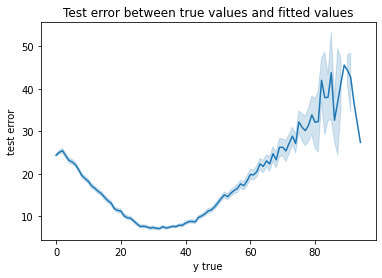

In [ ]:
df = pd.DataFrame({'y true': y_te, 'y pred': y_LDS_pred})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error between true values and fitted values')

* Linear Regression:

In [ ]:
linear_LDS = Sequential()
linear_LDS.add(Dense(1, input_shape=(6,), kernel_initializer='normal'))
linear_LDS.compile(loss='mse', optimizer='adam')
linear_LDS.fit(train_loader.x, train_loader.y, validation_data=(val_loader.x, val_loader.y), sample_weight=train_loader.weights, epochs=3)

Epoch 1/3
14667/14667 [==============================] - 47s 3ms/step - loss: 717.6991 - val_loss: 389.2221
Epoch 2/3
14667/14667 [==============================] - 45s 3ms/step - loss: 461.7703 - val_loss: 311.2102
Epoch 3/3
14667/14667 [==============================] - 43s 3ms/step - loss: 395.1503 - val_loss: 301.7726


In [ ]:
linear_LDS.save('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/linear_LDS.h5')

In [ ]:
linear_LDS = load_model('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/linear_LDS.h5')

In [ ]:
y_lr_LDS_pred = linear_LDS.predict(test_loader.x)
y_lr_LDS_pred = np.squeeze(y_lr_LDS_pred)

1834/1834 [==============================] - 2s 1ms/step


Text(0.5, 1.0, 'Test error of LDS with Linear Regression')

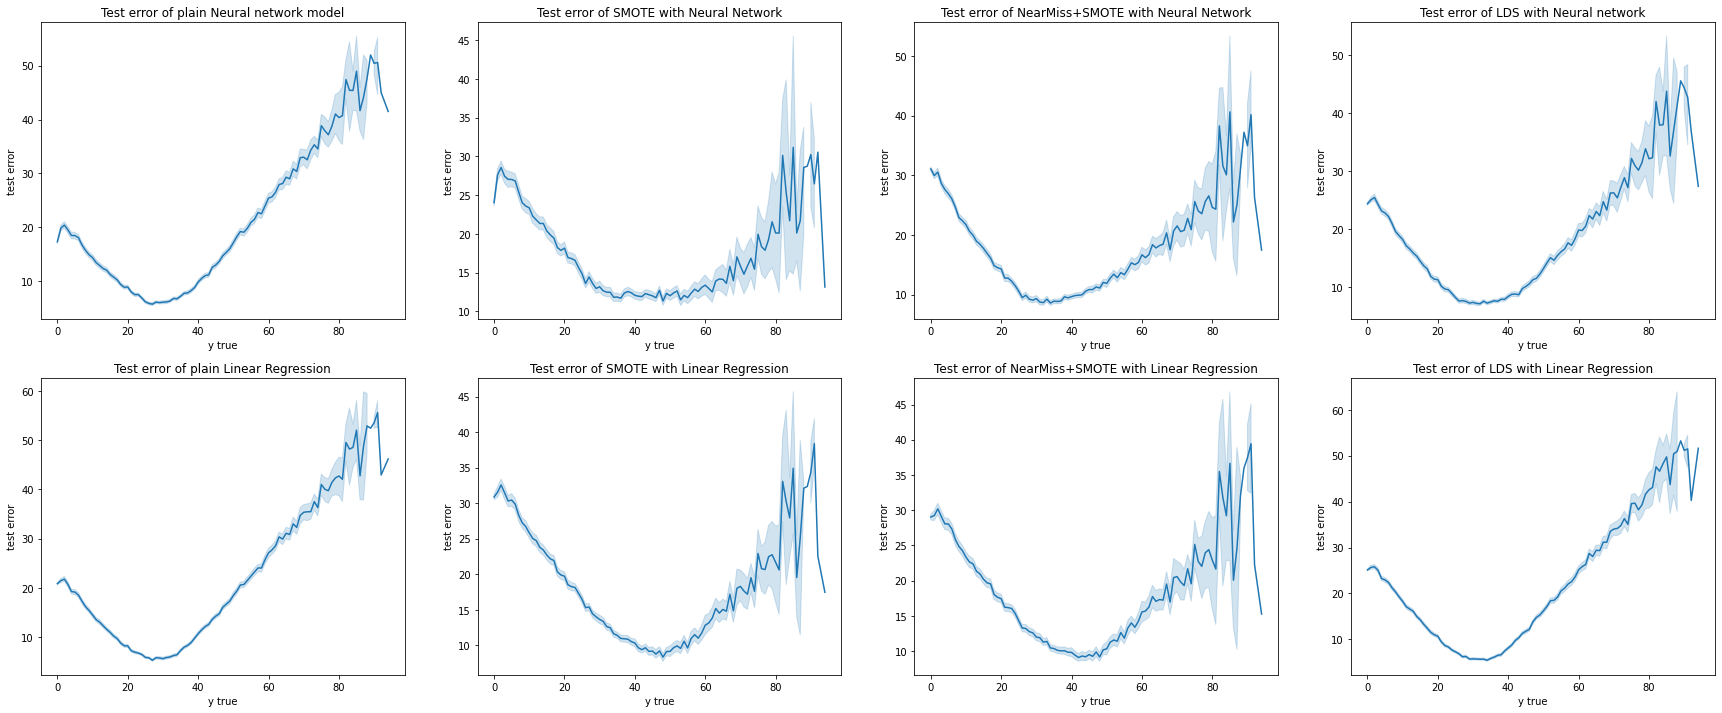

In [ ]:
plt.figure(figsize=(30,12))
plt.subplot(2,4,1)
df = pd.DataFrame({'y true': y_te, 'y pred': y_plain_predict})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x=df['y true'], y=df['test error'])
plt.title('Test error of plain Neural network model')

plt.subplot(2,4,2)
df = pd.DataFrame({'y true': y_te, 'y pred': y_smote_pred})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of SMOTE with Neural Network')


plt.subplot(2,4,3)
df = pd.DataFrame({'y true': y_te, 'y pred': y_resample1_pred})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of NearMiss+SMOTE with Neural Network')

plt.subplot(2,4,4)
df = pd.DataFrame({'y true': y_te, 'y pred': y_LDS_pred})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of LDS with Neural network')


plt.subplot(2,4,5)
df = pd.DataFrame({'y true': y_te, 'y pred': y_lr_predict})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of plain Linear Regression')

plt.subplot(2,4,6)
df = pd.DataFrame({'y true': y_te, 'y pred': np.squeeze(y_lr_re_pred)})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of SMOTE with Linear Regression')

plt.subplot(2,4,7)
df = pd.DataFrame({'y true': y_te, 'y pred': y_lr_re_pred2})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of NearMiss+SMOTE with Linear Regression')

plt.subplot(2,4,8)
df = pd.DataFrame({'y true': y_te, 'y pred': y_lr_LDS_pred})
df['test error'] = abs(df['y pred'] - df['y true'])
sns.lineplot(data=df, x='y true', y='test error')
plt.title('Test error of LDS with Linear Regression')


## Evaluate

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def short_metrics(preds, labels, train_labels, many_shot_thr=100000, low_shot_thr=10000):
  train_class_count, test_class_count = [], []
  mse_per_class, l1_per_class, r2_per_class = [], [], []
  for l in np.unique(np.floor(labels)):
    train_class_count.append(len(train_labels[np.floor(train_labels)==l]))
    test_class_count.append(len(labels[np.floor(labels)==l]))
    mse_per_class.append(np.sum((preds[np.floor(labels)==l]-labels[np.floor(labels)==l])**2))
    l1_per_class.append(np.sum(np.abs(preds[np.floor(labels)==l]-labels[np.floor(labels)==l])))
    r2_per_class.append(r2_score(labels[np.floor(labels)==l],preds[np.floor(labels)==l]))

  many_shot_mse, median_shot_mse, low_shot_mse = [], [], []
  many_shot_l1, median_shot_l1, low_shot_l1 = [], [], []
  many_shot_r2, median_shot_r2, low_shot_r2 = [], [], []
  many_shot_cnt, median_shot_cnt, low_shot_cnt = [], [], []
  for i in range(len(train_class_count)):
      if train_class_count[i] > many_shot_thr:
          many_shot_mse.append(mse_per_class[i])
          many_shot_l1.append(l1_per_class[i])
          many_shot_r2.append(r2_per_class[i])
          many_shot_cnt.append(test_class_count[i])
      elif train_class_count[i] < low_shot_thr:
          low_shot_mse.append(mse_per_class[i])
          low_shot_l1.append(l1_per_class[i])
          low_shot_r2.append(r2_per_class[i])
          low_shot_cnt.append(test_class_count[i])
      else:
          median_shot_mse.append(mse_per_class[i])
          median_shot_l1.append(l1_per_class[i])
          median_shot_r2.append(r2_per_class[i])
          median_shot_cnt.append(test_class_count[i])

  shot_dict = {}
  shot_dict['many mse'] = np.sum(many_shot_mse) / np.sum(many_shot_cnt)
  shot_dict['many l1'] = np.sum(many_shot_l1) / np.sum(many_shot_cnt)
  shot_dict['many r2'] = np.sum(many_shot_r2) / np.sum(many_shot_cnt)
  shot_dict['median mse'] = np.sum(median_shot_mse) / np.sum(median_shot_cnt)
  shot_dict['median l1'] = np.sum(median_shot_l1) / np.sum(median_shot_cnt)
  shot_dict['median r2'] = np.sum(median_shot_r2) / np.sum(median_shot_cnt)
  shot_dict['low mse'] = np.sum(low_shot_mse) / np.sum(low_shot_cnt)
  shot_dict['low l1'] = np.sum(low_shot_l1) / np.sum(low_shot_cnt)
  shot_dict['low r2'] = np.sum(low_shot_r2) / np.sum(low_shot_cnt)

  mse = mean_squared_error(preds, labels)
  mae = mean_absolute_error(preds, labels)
  r2 = r2_score(labels, preds)
  print(f" * Overall: MSE {mse:.3f}\tL1 {mae:.3f}\tR2 {r2:.3f}")
  print(f" * Many: MSE {shot_dict['many mse']:.3f}\t"
              f"L1 {shot_dict['many l1']:.3f}\tR2 score {shot_dict['many r2']:.3f}")
  print(f" * Median: MSE {shot_dict['median mse']:.3f}\t"
              f"L1 {shot_dict['median l1']:.3f}\tR2 score {shot_dict['median r2']:.3f}")
  print(f" * Low: MSE {shot_dict['low mse']:.3f}\t"
              f"L1 {shot_dict['low l1']:.3f}\tR2 score {shot_dict['low r2']:.3f}")

  return None

In [ ]:
np.unique(y_tr, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([35857,  9658,  7702,  6568,  6172,  6210,  6088,  6191,  6411,
         6623,  6416,  6487,  6396,  6739,  7011,  6951,  7459,  7338,
         7566,  8272,  8016,  8434,  8950,  9699,  8918,  8689,  8669,
         9067,  8884,  8572,  8156,  8304,  8546,  8909,  9087,  9793,
         9510,  8613,  8100,  7992,  7936,  7734,  7275,  7053,  6839,
         6471,  5855,  5629,  5458,  5238,  5027,  4829,  4428,  4189,
   

Từ kết quả đếm các giá trị của y train trên, ta chọn many_shot_thr=5000 và low_shot_thr=50

* Đánh giá khi sử dụng Linear Regression

In [ ]:
short_metrics(y_lr_predict, y_te, y_tr, many_shot_thr=5000, low_shot_thr=500)

 * Overall: MSE 272.335	L1 13.439	R2 0.188
 * Many: MSE 204.301	L1 11.742	R2 score 0.000
 * Median: MSE 732.172	L1 25.393	R2 score 0.000
 * Low: MSE 1899.890	L1 42.708	R2 score nan


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


* Đánh giá khi sử dụng Linear Regression với resampling data

In [ ]:
short_metrics(np.squeeze(y_lr_re_pred), y_te, y_tr, many_shot_thr=5000, low_shot_thr=500)

 * Overall: MSE 478.245	L1 17.748	R2 -0.426
 * Many: MSE 503.666	L1 18.396	R2 score 0.000
 * Median: MSE 270.402	L1 12.456	R2 score 0.000
 * Low: MSE 713.531	L1 23.488	R2 score nan


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


* Đánh giá khi sử dụng Linear Regression với SMOTE + Near Miss + Random Oversampling

In [ ]:
short_metrics(y_lr_re_pred2, y_te, y_tr, many_shot_thr=5000, low_shot_thr=500)

 * Overall: MSE 439.032	L1 16.801	R2 -0.309
 * Many: MSE 450.736	L1 17.066	R2 score 0.000
 * Median: MSE 331.803	L1 14.375	R2 score 0.000
 * Low: MSE 817.375	L1 25.191	R2 score nan


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


* Đánh giá khi sử dụng Linear Regression với LDS

In [ ]:
short_metrics(y_lr_LDS_pred, test_loader.y, train_loader.y, many_shot_thr=5000, low_shot_thr=500)

 * Overall: MSE 304.882	L1 14.340	R2 0.091
 * Many: MSE 255.975	L1 13.059	R2 score 0.000
 * Median: MSE 622.291	L1 23.151	R2 score 0.000
 * Low: MSE 1782.773	L1 41.395	R2 score nan


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


* Đánh giá khi chỉ sử dụng deep neural network

In [ ]:
short_metrics(y_plain_predict, y_te, y_tr, many_shot_thr=5000, low_shot_thr=500)

 * Overall: MSE 247.133	L1 12.669	R2 0.263
 * Many: MSE 181.930	L1 11.010	R2 score 0.000
 * Median: MSE 689.109	L1 24.363	R2 score 0.000
 * Low: MSE 1777.044	L1 41.089	R2 score nan


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


* Đánh giá khi sử dụng Deep neural network với resampling data bằng SMOTE

In [ ]:
short_metrics(y_smote_pred, y_te, y_tr, many_shot_thr=5000, low_shot_thr=500)

 * Overall: MSE 441.886	L1 16.913	R2 -0.318
 * Many: MSE 462.694	L1 17.391	R2 score 0.000
 * Median: MSE 272.804	L1 13.025	R2 score 0.000
 * Low: MSE 609.895	L1 20.792	R2 score nan


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


* Đánh giá khi sử dụng Deep neural network với resampling data bằng SMOTE + NearMiss + Random over_sampling

In [ ]:
short_metrics(y_resample1_pred, y_te, y_tr, many_shot_thr=5000, low_shot_thr=500)

 * Overall: MSE 397.934	L1 16.111	R2 -0.187
 * Many: MSE 403.818	L1 16.233	R2 score 0.000
 * Median: MSE 333.168	L1 14.774	R2 score 0.000
 * Low: MSE 842.285	L1 25.085	R2 score nan


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


* Đánh giá khi sử dụng Deep neural network với LDS

In [ ]:
short_metrics(y_LDS_pred, test_loader.y, train_loader.y, many_shot_thr=5000, low_shot_thr=500)

 * Overall: MSE 277.832	L1 13.511	R2 0.172
 * Many: MSE 243.495	L1 12.610	R2 score 0.000
 * Median: MSE 500.092	L1 19.624	R2 score 0.000
 * Low: MSE 1329.173	L1 34.592	R2 score nan


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Lưu các mô hình

In [ ]:
plain_model.save('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/plain_model.h5')
resample_model.save('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/resample_model.h5')
resample_model_ver2.save('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/resample_model_ver2.h5')
LDS_model.save('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/LDS_model.h5')

In [ ]:
X_te.to_csv('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/xtest.csv')
y_te.to_csv('/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/ytest.csv')

In [ ]:
import pickle
file_name='/content/drive/MyDrive/Phân tích và trực quan dữ liệu/model/lr_model.sav'
pickle.dump(lr, open(file_name,'wb'))